In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
x = np.arange(-1,1,0.01)
y = 1 / (np.exp(x))

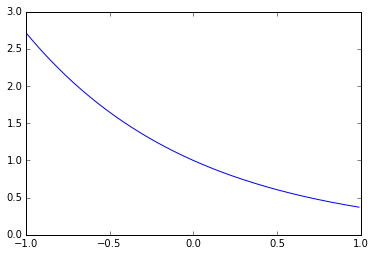

In [14]:
plt.plot(x,y)